**Batch size doubled from 128 to 256**

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 256
num_classes = 10
epochs = 40

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 14s 272us/step - loss: 2.4211 - acc: 0.2237 - val_loss: 1.9503 - val_acc: 0.2758
Epoch 2/40
50000/50000 [==============================] - 14s 275us/step - loss: 1.9112 - acc: 0.3058 - val_loss: 1.9658 - val_acc: 0.2727
Epoch 3/40
50000/50000 [==============================] - 13s 267us/step - loss: 1.8356 - acc: 0.3392 - val_loss: 1.7480 - val_acc: 0.3601
Epoch 4/40
50000/50000 [==============================] - 14s 278us/step - loss: 1.7805 - acc: 0.3611 - val_loss: 1.7877 - val_acc: 0.3761
Epoch 5/40
50000/50000 [==============================] - 14s 275us/step - loss: 1.7295 - acc: 0.3803 - val_loss: 1.7453 - val_acc: 0.3699
Epoch 6/40
50000/50000 [==============================] - 14s 278us/step - loss: 1.6978 - acc: 0.3945 - val_loss: 1.6341 - val_acc: 0.4143
Epoch 7/40
50000/50000 [==============================] - 14s 278us/step - loss: 1.6710 - acc: 0.4019 - val_loss: 1.

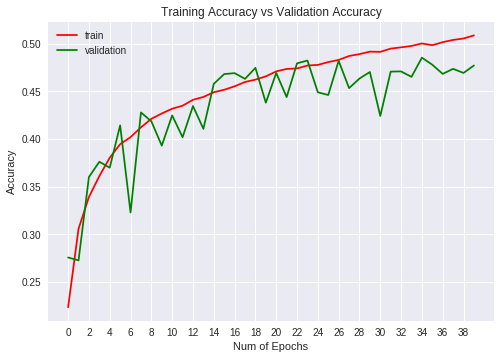

In [0]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 40, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

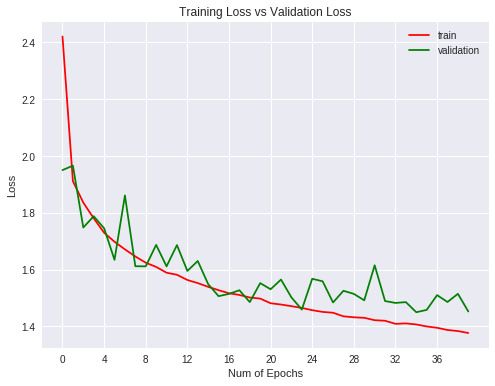

In [0]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 40, 4.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

**Conclusion:**
Doubled the batch size from 128 to 256. The model is overfitting. But the running time reduced by 6 secs per Epoch.